In [53]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read CSV File  
data = pd.read_csv("Titanic-Dataset.csv")

In [50]:
# Exploring Dataset
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,0.014151,1,0,1
1,1,1,38.0,1,0,0.139136,0,0,0
2,1,3,26.0,0,0,0.015469,0,0,1
3,1,1,35.0,1,0,0.103644,0,0,1
4,0,3,35.0,0,0,0.015713,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check Missing Values
data.isna().sum().sort_values(ascending=False)

Cabin 687
Age 177
Embarked 2
PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
SibSp 0
Parch 0
Ticket 0
Fare 0
dtype: int64

In [6]:
data.drop('Cabin' , inplace = True ,axis=1)

In [7]:
mean_age_female = data[data['Sex'] == 'female']['Age'].mean()
mean_age_female

27.915708812260537

In [8]:
data.loc[data['Sex'] == 'female', 'Age'] = data[data['Sex'] == 'female']['Age'].fillna(mean_age_female)

In [9]:
mean_age_male = data[data['Sex'] == 'male']['Age'].mean()
mean_age_male

30.72664459161148

In [10]:
data.loc[data['Sex'] == 'male', 'Age'] = data[data['Sex'] == 'male']['Age'].fillna(mean_age_male)

In [11]:
data['Embarked'] = data['Embarked'].fillna('S')

In [12]:
data.isna().sum().sort_values(ascending=False)

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Embarked 0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# Handling Categorical Features
sex = pd.get_dummies(data['Sex'],drop_first=True)

In [16]:
embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [17]:
data.drop('PassengerId' , inplace = True ,axis=1)

In [18]:
data.drop('Name' , inplace = True ,axis=1)

In [19]:
data.drop('Ticket' , inplace = True ,axis=1)

In [20]:
data.drop('Sex' , inplace = True ,axis=1)

In [21]:
data.drop('Embarked' , inplace = True ,axis=1)

In [22]:
data = pd.concat([data,sex,embarked],axis=1)

In [23]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: xlabel='Survived', ylabel='count'>

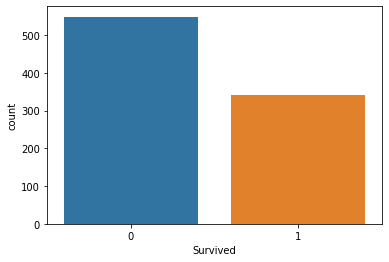

In [24]:
# Visualizing
sns.countplot(x=data['Survived'], data= data)

<Axes: xlabel='Survived', ylabel='count'>

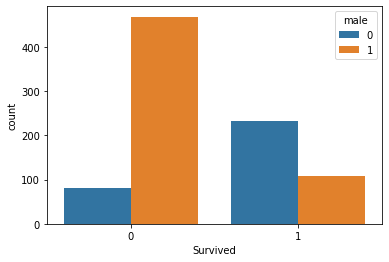

In [25]:
sns.countplot(x=data['Survived'], data= data , hue='male')

<Axes: xlabel='Survived', ylabel='count'>

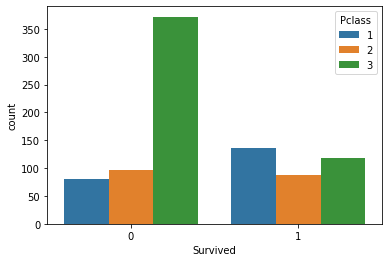

In [26]:
sns.countplot(x=data['Survived'], data= data , hue='Pclass')

<Axes: >

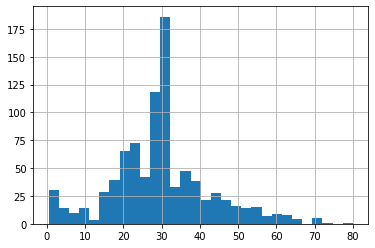

In [27]:
data['Age'].hist(bins=30)

<Axes: >

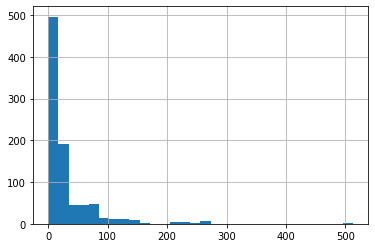

In [28]:
data['Fare'].hist(bins=30)

In [51]:
# PreProcessing
le = LabelEncoder()
data['male'] = le.fit_transform(data['male'])
data['Q'] = le.fit_transform(data['Q'])
data['S'] = le.fit_transform(data['S'])

In [30]:
sc = MinMaxScaler()
data['Fare'] = sc.fit_transform(data['Fare'].values.reshape(-1, 1))

<Axes: >

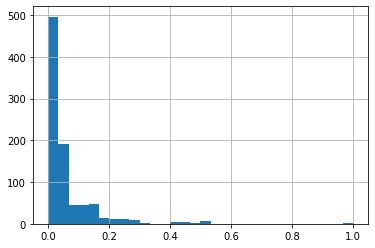

In [31]:
data['Fare'].hist(bins=30)

In [32]:
# Build Models
x = data.drop((['Survived']) , axis = 1)
y = data['Survived']

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [55]:
# Logistic Regression
LR_model = LogisticRegression(max_iter=1000,random_state=42)
# SVM 
SVM_model= SVC(kernel='linear',random_state=42)
# Decision Tree
DTree_model= DecisionTreeClassifier(max_depth=10 ,criterion='gini',min_samples_split=4,min_samples_leaf=4,max_features=None,random_state=42)
# RAndom Forests
RF_model= RandomForestClassifier(n_estimators=100,random_state=42)
# Bayesian Classifier
Bayes_model = GaussianNB()

In [35]:
LR_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression(max_iter=1000, random_state=42)

In [36]:
SVM_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC SVC(kernel='linear', random_state=42)

In [37]:
DTree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
 random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. DecisionTreeClassifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
 random_state=42)

In [38]:
RF_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestClassifier RandomForestClassifier(random_state=42)

In [56]:
Bayes_model.fit(x_train,y_train)

GaussianNB() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GaussianNB GaussianNB()

In [57]:
y_LRpred = LR_model.predict(x_test)
y_SVMpred = SVM_model.predict(x_test)
y_DtreePred = DTree_model.predict(x_test)
y_RFPred = RF_model.predict(x_test)
y_BayesPred = Bayes_model.predict(x_test)

NotFittedError: NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [40]:
def evaluation_matrix(accuracy,precision,recall,f1):
    print(f"Accuracy: {accuracy*100:.4f}")
    print(f"Precision: {precision*100:.4f}")
    print(f"Recall: {recall*100:.4f}")
    print(f"F1-score: {f1*100:.4f}")

In [41]:
LR_accuracy = accuracy_score(y_test, y_LRpred)
LR_precision = precision_score(y_test, y_LRpred)
LR_recall = recall_score(y_test, y_LRpred)
LR_f1 = f1_score(y_test, y_LRpred)
evaluation_matrix(LR_accuracy,LR_precision,LR_recall,LR_f1)

Accuracy: 81.0056
Precision: 78.5714
Recall: 74.3243
F1-score: 76.3889


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

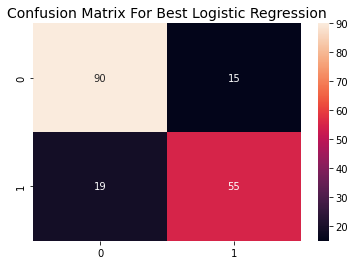

In [42]:
lr_grid_y_pred = LR_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)

In [43]:

SVM_accuracy = accuracy_score(y_test, y_SVMpred)
SVM_precision = precision_score(y_test, y_SVMpred)
SVM_recall = recall_score(y_test, y_SVMpred)
SVM_f1 = f1_score(y_test, y_SVMpred)
evaluation_matrix(SVM_accuracy,SVM_precision,SVM_recall,SVM_f1)

Accuracy: 78.2123
Precision: 75.3623
Recall: 70.2703
F1-score: 72.7273


Text(0.5, 1.0, 'Confusion Matrix For SVM')

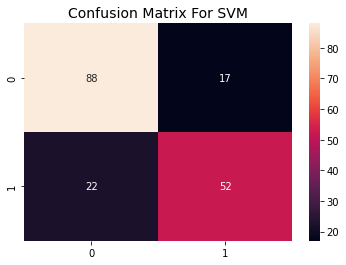

In [44]:
SVM_grid_y_pred = SVM_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, SVM_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For SVM", fontsize=14)

In [45]:
DTree_accuracy = accuracy_score(y_test, y_DtreePred)
DTree_precision = precision_score(y_test, y_DtreePred)
DTree_recall = recall_score(y_test, y_DtreePred)
DTree_f1 = f1_score(y_test, y_DtreePred)
evaluation_matrix(DTree_accuracy,DTree_precision,DTree_recall,DTree_f1)

Accuracy: 84.9162
Precision: 85.0746
Recall: 77.0270
F1-score: 80.8511


Text(0.5, 1.0, 'Confusion Matrix For Decision tree')

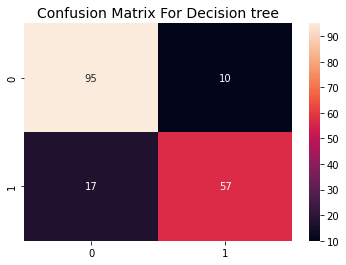

In [46]:
DTree_grid_y_pred = DTree_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, DTree_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Decision tree", fontsize=14)

In [47]:

RF_accuracy = accuracy_score(y_test, y_RFPred)
RF_precision = precision_score(y_test, y_RFPred)
RF_recall = recall_score(y_test, y_RFPred)
RF_f1 = f1_score(y_test, y_RFPred)
evaluation_matrix(RF_accuracy,RF_precision,RF_recall,RF_f1)

Accuracy: 81.5642
Precision: 78.8732
Recall: 75.6757
F1-score: 77.2414


Text(0.5, 1.0, 'Confusion Matrix For Random forest ')

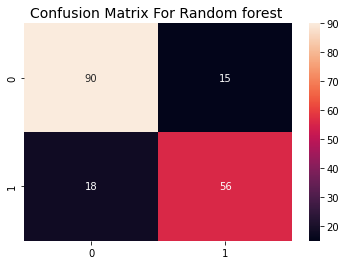

In [48]:
RF_grid_y_pred = RF_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, RF_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Random forest ", fontsize=14)

In [58]:
Bayes_accuracy = accuracy_score(y_test, y_RFPred)
Bayes_precision = precision_score(y_test, y_RFPred)
Bayes_recall = recall_score(y_test, y_RFPred)
Bayes_f1 = f1_score(y_test, y_RFPred)
evaluation_matrix(Bayes_accuracy,Bayes_precision,Bayes_recall,Bayes_f1)

Accuracy: 81.5642
Precision: 78.8732
Recall: 75.6757
F1-score: 77.2414


Text(0.5, 1.0, 'Confusion Matrix For Bayesian Classifier ')

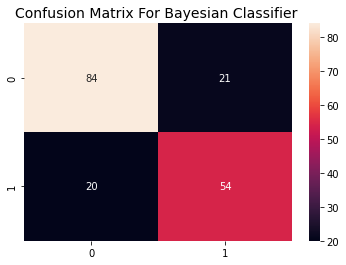

In [59]:
Bayes_grid_y_pred = Bayes_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, Bayes_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Bayesian Classifier ", fontsize=14)

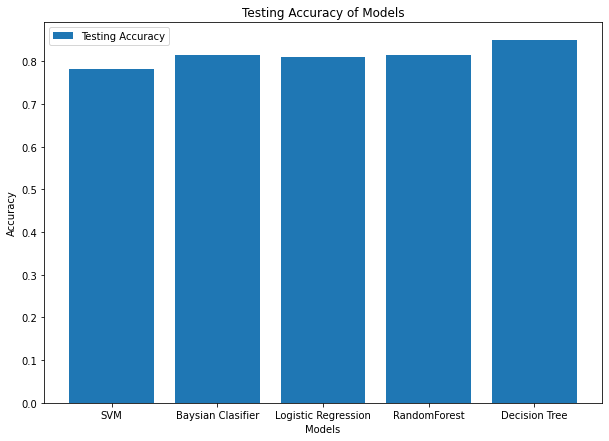

In [62]:
model_names = ['SVM','Baysian Clasifier','Logistic Regression', 'RandomForest','Decision Tree']
train_accuracies = [SVM_accuracy,Bayes_accuracy,LR_accuracy,RF_accuracy,DTree_accuracy]     
plt.figure(figsize=(10, 7))
plt.bar(model_names, train_accuracies, label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Models')
plt.legend()
plt.show()